# HOUSE PRICE PREDICTOR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
traindf=pd.read_csv("train.csv")

In [3]:
traindf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
numeric_df=traindf.select_dtypes(include='number')
correlation_matrix=numeric_df.corr()
correlation_matrix['SalePrice'].sort_values(ascending= False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [5]:
req_tr=["GarageArea","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd","SalePrice"]

In [6]:
selected_tr=traindf[req_tr]

In [7]:
selected_tr.loc[:,'TotalBath']=(selected_tr['BsmtFullBath'].fillna(0)+
                                selected_tr['BsmtHalfBath'].fillna(0)+
                               selected_tr['FullBath'].fillna(0)+
                               selected_tr['HalfBath'].fillna(0))
selected_tr.loc[:,'TotalSF']=(selected_tr['TotalBsmtSF'].fillna(0)+
                             selected_tr['1stFlrSF'].fillna(0)+
                             selected_tr['2ndFlrSF'].fillna(0)+
                             selected_tr['LowQualFinSF'].fillna(0)+
                             selected_tr['BsmtFullBath'].fillna(0)+
                             selected_tr['GrLivArea'].fillna(0))

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [8]:
selected_tr

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,SalePrice,TotalBath,TotalSF
0,548,7,856,856,854,0,1710,1,0,2,1,8,208500,4,4277
1,460,6,1262,1262,0,0,1262,0,1,2,0,6,181500,3,3786
2,608,7,920,920,866,0,1786,1,0,2,1,6,223500,4,4493
3,642,7,756,961,756,0,1717,1,0,1,0,7,140000,2,4191
4,836,8,1145,1145,1053,0,2198,1,0,2,1,9,250000,4,5542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,6,953,953,694,0,1647,0,0,2,1,7,175000,3,4247
1456,500,6,1542,2073,0,0,2073,1,0,2,0,7,210000,3,5689
1457,252,7,1152,1188,1152,0,2340,0,0,2,0,9,266500,2,5832
1458,240,5,1078,1078,0,0,1078,1,0,1,0,5,142125,2,3235


# Having the required columns

In [9]:
train_df=selected_tr[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual','SalePrice']]

In [10]:
train_df

,TotRmsAbvGrd,TotalBath,GarageArea,TotalSF,OverallQual,SalePrice
0,8,4,548,4277,7,208500
1,6,3,460,3786,6,181500
2,6,4,608,4493,7,223500
3,7,2,642,4191,7,140000
4,9,4,836,5542,8,250000
...,...,...,...,...,...,...
1455,7,3,460,4247,6,175000
1456,7,3,500,5689,6,210000
1457,9,2,252,5832,7,266500
1458,5,2,240,3235,5,142125


# Split the dataset and create the pipeline

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(train_df,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:1168
Rows in test set:292



In [13]:
housing=train_set.drop("SalePrice",axis=1)
housing_labels=train_set["SalePrice"].copy()

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [15]:
x_train=my_pipeline.fit_transform(housing)

In [16]:
x_train

array([[-0.96456591, -0.48377079, -0.86383727, -0.13307498, -0.82044456],
       [ 0.27075534,  0.61127627, -0.45626397, -0.13460458, -0.08893368],
       [-1.58222654, -1.57881784, -2.25716927, -1.32233699, -0.82044456],
       ...,
       [-0.96456591, -0.48377079,  0.45366713, -1.16555326, -0.82044456],
       [ 0.27075534, -0.48377079, -1.23349678, -0.26997395,  0.64257719],
       [ 0.27075534, -0.48377079,  0.87071888,  0.27991633,  0.64257719]])

In [17]:
y_train=housing_labels

In [18]:
y_train.shape

(1168,)

# CORRELATIONS

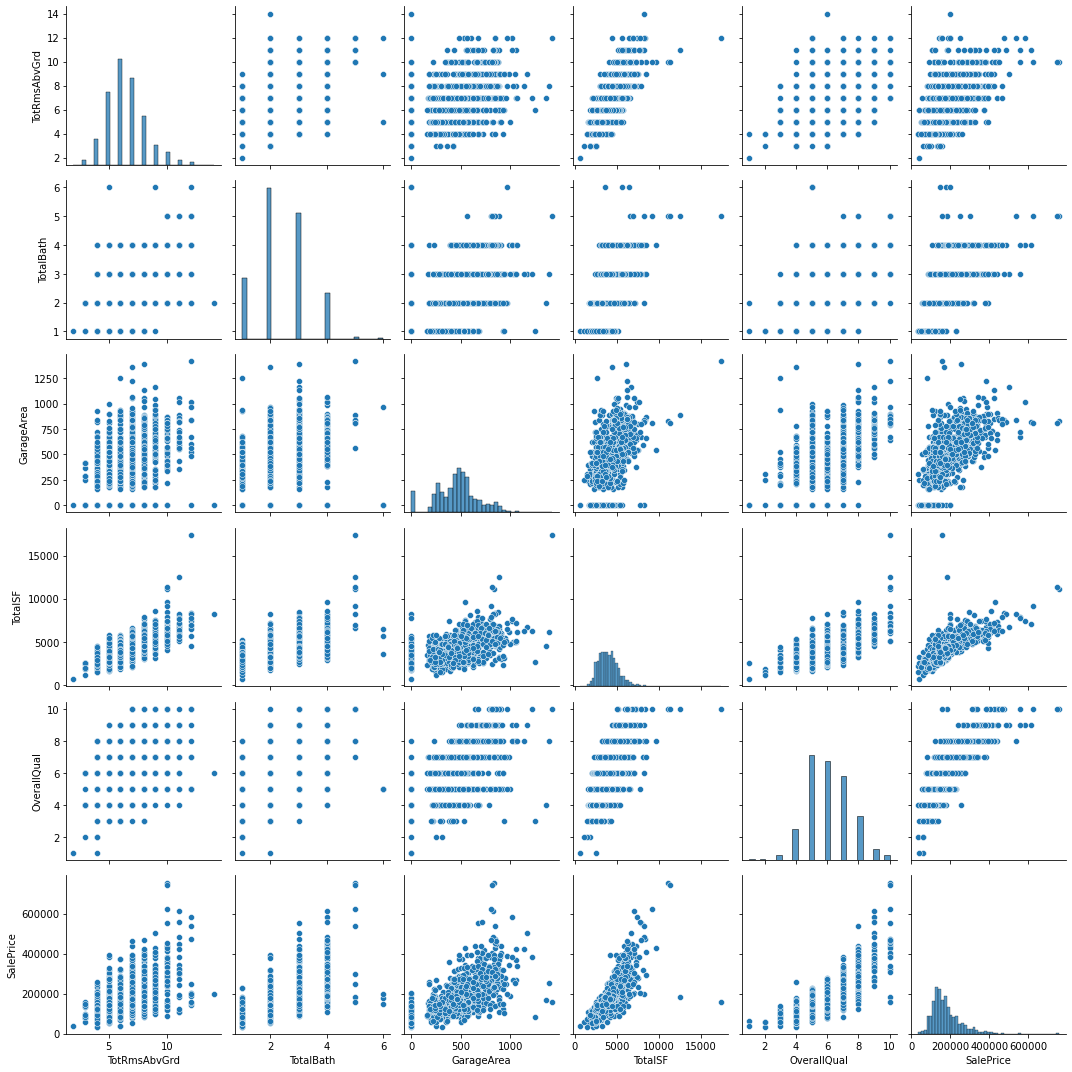

In [19]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
%matplotlib inline
sns.pairplot(train_df)
plt.tight_layout()
plt.show()

In [21]:
corr_matrix=train_df.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
TotalSF         0.773959
GarageArea      0.623431
TotalBath       0.613005
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

<AxesSubplot:>

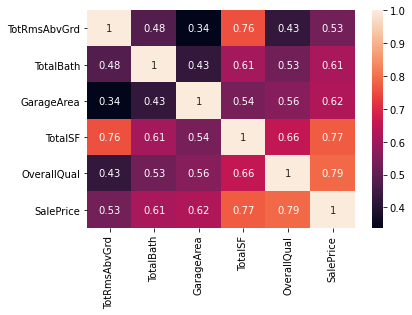

In [23]:
sns.heatmap(train_df.corr(),annot=True)

# TEST DATAFRAME

In [24]:
testdf=pd.read_csv("test.csv")

In [25]:
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [28]:
req_tst=["GarageArea","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd"]

In [29]:
selected_tst=testdf[req_tst]

In [30]:
selected_tst.loc[:,'TotalBath']=(selected_tr['BsmtFullBath'].fillna(0)+
                                selected_tr['BsmtHalfBath'].fillna(0)+
                               selected_tr['FullBath'].fillna(0)+
                               selected_tr['HalfBath'].fillna(0))
selected_tst.loc[:,'TotalSF']=(selected_tr['TotalBsmtSF'].fillna(0)+
                             selected_tr['1stFlrSF'].fillna(0)+
                             selected_tr['2ndFlrSF'].fillna(0)+
                             selected_tr['LowQualFinSF'].fillna(0)+
                             selected_tr['BsmtFullBath'].fillna(0)+
                             selected_tr['GrLivArea'].fillna(0))

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [31]:
selected_tst

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,TotalBath,TotalSF
0,730.0,5,882.0,896,0,0,896,0.0,0.0,1,0,5,4,4277
1,312.0,6,1329.0,1329,0,0,1329,0.0,0.0,1,1,6,3,3786
2,482.0,5,928.0,928,701,0,1629,0.0,0.0,2,1,6,4,4493
3,470.0,6,926.0,926,678,0,1604,0.0,0.0,2,1,7,2,4191
4,506.0,8,1280.0,1280,0,0,1280,0.0,0.0,2,0,5,4,5542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,5,3,3664
1455,286.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,6,3,4247
1456,576.0,5,1224.0,1224,0,0,1224,1.0,0.0,1,0,7,3,5689
1457,0.0,5,912.0,970,0,0,970,0.0,1.0,1,0,6,2,5832


In [32]:
test_df_unproc=selected_tst[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual']]

In [33]:
test_df_unproc

,TotRmsAbvGrd,TotalBath,GarageArea,TotalSF,OverallQual
0,5,4,730.0,4277,5
1,6,3,312.0,3786,6
2,6,4,482.0,4493,5
3,7,2,470.0,4191,6
4,5,4,506.0,5542,8
...,...,...,...,...,...
1454,5,3,0.0,3664,4
1455,6,3,286.0,4247,4
1456,7,3,576.0,5689,5
1457,6,2,0.0,5832,5


In [35]:
test_df=test_df_unproc.fillna(test_df_unproc.mean())
x_test=my_pipeline.transform(test_df[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual']].values)
x_test

array([[-0.96456591,  1.70632332,  1.2024646 ,  0.1223678 , -0.82044456],
       [-0.34690528,  0.61127627, -0.77853123, -0.25314838, -0.08893368],
       [-0.34690528,  1.70632332,  0.02713693,  0.28756432, -0.82044456],
       ...,
       [ 0.27075534,  0.61127627,  0.47262403,  1.20226359, -0.82044456],
       [-0.34690528, -0.48377079, -2.25716927,  1.31162981, -0.82044456],
       [ 1.50607659, -0.48377079,  0.82332664, -0.67455247,  0.64257719]])

# Model Selection

In [39]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
y_train_pred=model.predict(x_train)

In [41]:
y_train_pred[:5]

array([147674.  , 173441.5 ,  92145.  , 163728.61, 146802.  ])

In [42]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

In [43]:
proc_data=my_pipeline.transform(some_data)

In [44]:
model.predict(proc_data)

array([147674.  , 173441.5 ,  92145.  , 163728.61, 146802.  ])

In [46]:
list(some_labels)

[145000, 178000, 85000, 175000, 127000]

In [50]:
from sklearn.metrics import mean_squared_error,r2_score
train_mse=mean_squared_error(y_train,y_train_pred)
train_rmse=np.sqrt(train_mse)
print(f"Training MSE:{train_mse:.2f},Training RMSE:{train_rmse:.2f}")

Training MSE:178248472.17,Training RMSE:13350.97


# Cross-Validation

In [53]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv=200)
rmse_scores=np.sqrt(-scores)

In [54]:
rmse_scores

array([ 22866.43717507,  15173.79657976,  26403.00289102,  11839.4361224 ,
        48094.60750207,  11756.21238085,  20056.49631123,  12602.87634249,
        11975.01637884,  50413.89660784,  37589.53272661,  29023.39507324,
        13405.57212792,   8702.65534853,  19993.80010026,  20134.19207667,
        20968.3038603 ,  32806.60607675,  37115.94629571,  23577.10764715,
        29561.9301546 ,  18869.49227859,  17244.37969516,  28333.48579382,
        19259.39899623,  16765.29428473,  40186.36029634,  38112.13153847,
       164500.05369038,  49609.5861846 ,  21233.93359685,  32364.08178001,
        24360.91253344,  31879.64589168,  50649.54322286,  13132.21350027,
        23679.17206717,  30019.21753798,  18885.7824614 ,  29465.42344909,
        17619.39393794,  30345.24556442,  26561.16228094,  35593.5515002 ,
        34437.99600319,  27225.41843265,  29695.92362038,  41572.77679876,
        22657.75706664,  21973.57767207,  21630.62848287,  51093.87072314,
        33979.75055524,  

In [55]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())

In [56]:
print_scores(rmse_scores)

Scores: [ 22866.43717507  15173.79657976  26403.00289102  11839.4361224
  48094.60750207  11756.21238085  20056.49631123  12602.87634249
  11975.01637884  50413.89660784  37589.53272661  29023.39507324
  13405.57212792   8702.65534853  19993.80010026  20134.19207667
  20968.3038603   32806.60607675  37115.94629571  23577.10764715
  29561.9301546   18869.49227859  17244.37969516  28333.48579382
  19259.39899623  16765.29428473  40186.36029634  38112.13153847
 164500.05369038  49609.5861846   21233.93359685  32364.08178001
  24360.91253344  31879.64589168  50649.54322286  13132.21350027
  23679.17206717  30019.21753798  18885.7824614   29465.42344909
  17619.39393794  30345.24556442  26561.16228094  35593.5515002
  34437.99600319  27225.41843265  29695.92362038  41572.77679876
  22657.75706664  21973.57767207  21630.62848287  51093.87072314
  33979.75055524  37114.61320969  20966.24362823  27418.37228161
  10415.54264196  25682.20075219  24320.77128835  31057.19883644
 189613.82075739  1

In [57]:
y_pred=model.predict(x_test)

In [58]:
y_pred

array([191903.5 , 149396.  , 209655.  , ..., 159803.  , 168518.87,
       160452.  ])